In [7]:
file_path = "/content/sample_data/concrete.dat"
with open(file_path, 'r') as file:
    content = file.readlines()

In [13]:
import pandas as pd
data = pd.read_csv(file_path, delimiter="\s+", header=None)


In [19]:
company1 = data[0]
company1

0     27.86
1     31.86
2     19.22
3     28.86
4     27.18
      ...  
75    21.87
76    21.81
77    27.71
78    25.65
79    25.59
Name: 0, Length: 80, dtype: float64

In [20]:
company2 = data[1]
company2

0     27.97
1     25.61
2     25.41
3     28.32
4     23.32
      ...  
75    24.72
76    23.51
77    27.83
78    24.53
79    23.77
Name: 1, Length: 80, dtype: float64

In [28]:
mean_strength1 = company1.mean()
mean_strength2 = company2.mean()

In [30]:
mean_strength1, mean_strength2

(26.653125, 24.823375)

In [31]:
standard_deviation1 = company1.std()
standard_deviation2 = company2.std()

In [32]:
standard_deviation1, standard_deviation2

(3.6344924928220372, 2.202689348029824)

In [33]:
cov1 = mean_strength1/standard_deviation1
cov2 = mean_strength2/standard_deviation2

In [34]:
cov1, cov2

(7.3333828733003985, 11.269575994546415)

In [67]:
u = 1.282 # because 1-c = 0.100

In [65]:
from google.colab import files
uploaded = files.upload()

Saving 20241117_235633.jpg to 20241117_235633.jpg


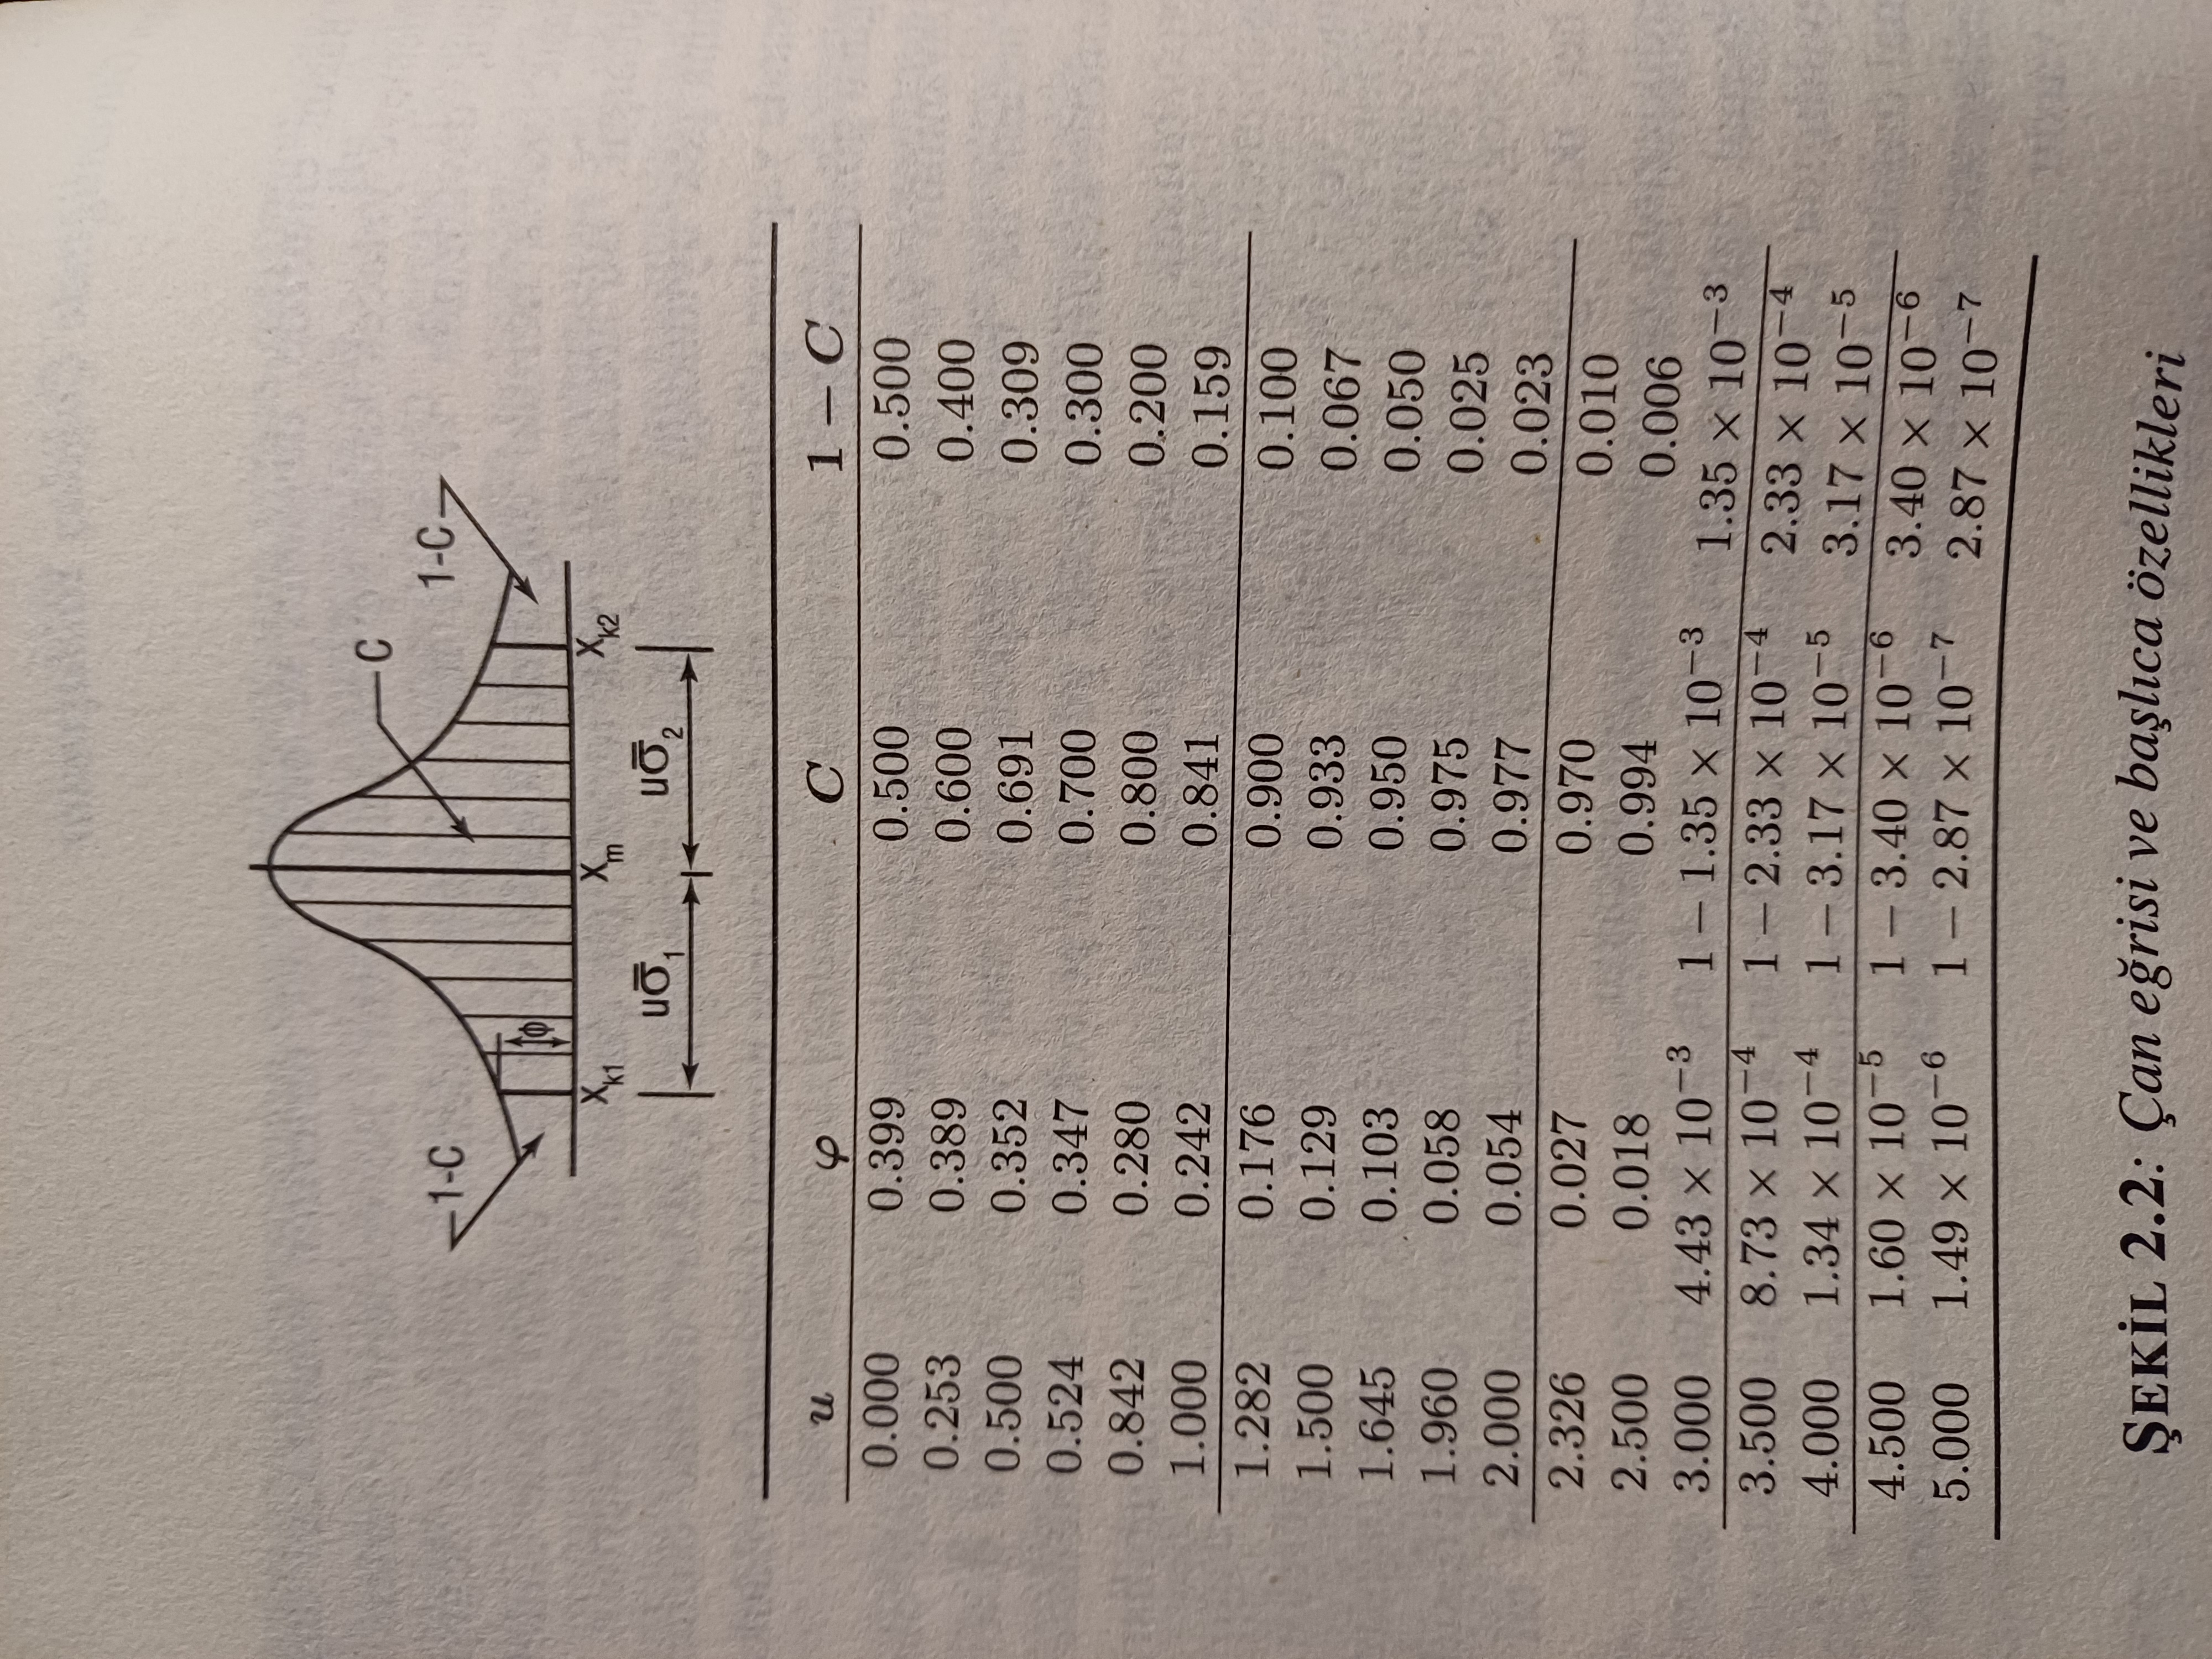

In [66]:
from IPython.display import Image

image_path = '20241117_235633.jpg'

# Resmi görüntüle
Image(image_path)


Yukarıdaki şekilde 1-C betonun dayanımının, karakteristik değerinden % kaç altında olacağını gösterir.
TS 500-2000 yönetmeliğine göre bu değer %10 dur. u katsayısının tabloda karşılık gelen değeri 1.282 dir.
fck = fm - u * (standart sapma) dan bulunabilir.
fck = karakteristik değer,
fm = ortalama değer

In [38]:
fck1 = mean_strength1 - u * standard_deviation1
fck2 = mean_strength2 - u * standard_deviation2

In [39]:
fck1, fck2

(21.993705624202146, 21.999527255825765)

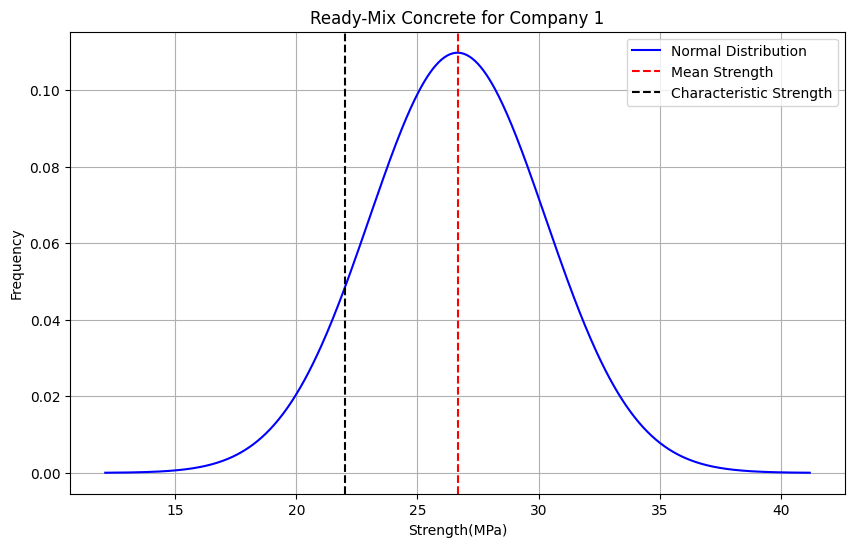

In [62]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

x1 = np.linspace(mean_strength1 - 4*standard_deviation1, mean_strength1 + 4*standard_deviation1, 500)

pdf1 = (1 / (standard_deviation1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mean_strength1) / standard_deviation1)**2)


plt.figure(figsize=(10, 6)) # Now plt refers to pyplot
plt.plot(x1, pdf1, label="Normal Distribution", color="blue")
plt.axvline(mean_strength1, color="red", linestyle="--", label="Mean Strength")
plt.axvline(fck1, color="black", linestyle="--", label="Characteristic Strength")
plt.title("Ready-Mix Concrete for Company 1")
plt.xlabel("Strength(MPa)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

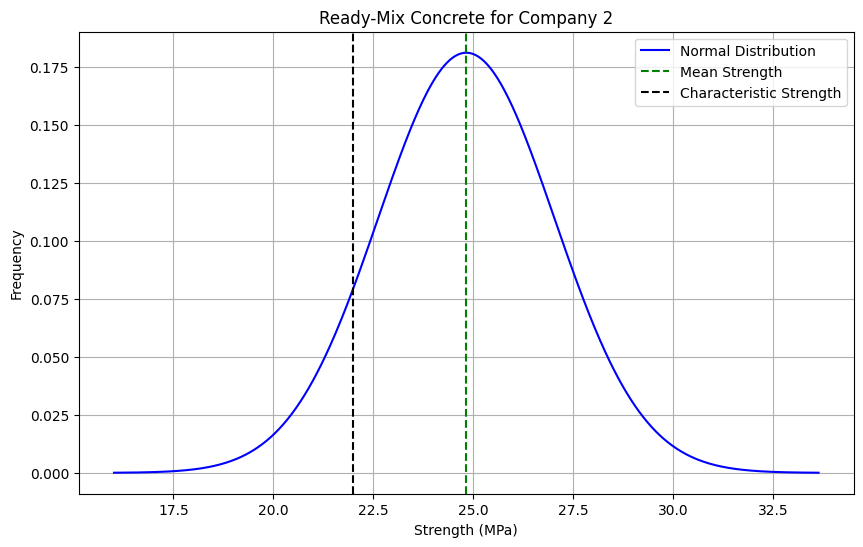

In [61]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt

x2 = np.linspace(mean_strength2 - 4*standard_deviation2, mean_strength2 + 4*standard_deviation2, 500)

pdf2 = (1 / (standard_deviation2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2 - mean_strength2) / standard_deviation2)**2)


plt.figure(figsize=(10, 6)) # Now plt refers to pyplot
plt.plot(x2, pdf2, label="Normal Distribution", color="blue")
plt.axvline(mean_strength2, color="green", linestyle="--"76, label="Mean Strength")
plt.axvline(fck2, color="black", linestyle="--", label="Characteristic Strength")
plt.title("Ready-Mix Concrete for Company 2")
plt.xlabel("Strength (MPa)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

a) Şirket 1 in ürettiği betonların ortalama dayanımı şirket 2'inkine göre daha fazladır ancak aynı karakteristik değeri elde ettiğimizden dolayı şirket 1 in ürettiği betonların maliyeti daha fazla olacaktır. Denetim kötüleştikçe maliyet artmaktadır.

b) Beton alınacaksa şirket 2'yi tercih etmek daha mantıklı olacaktır. Üstelik C40 beton için ortalama minimum değer aynı cov değeri alındığında aşağıdaki gibi olacaktır.

In [69]:
Xm1_40 = 40 + 1.282 * cov1
Xm2_40 = 40 + 1.282 * cov2
Xm1_40, Xm2_40

(49.40139684357111, 54.447596425008506)